# Analysis of Student Performance
**Goal:** Predict the **Performance Index** of a student based on the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

#%cd Machine-Learning-Exercise-2-main/notebooks
#%pwd

sys.path.append(os.path.abspath(os.path.join('..')))

from src.regression_tree import RegressionTree
from src.random_forest import RandomForest
from src.utils import evaluate_model

# Set plot style
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
# Load the dataset
file_path = os.path.join('..', 'data', 'Student_Performance.csv')
df_raw = pd.read_csv(file_path)

print(f"Original Shape: {df_raw.shape}")
df_raw.head()

Original Shape: (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Preprocessing

In [3]:
# search for missing values
df_raw.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

The dataset contains no missing values.

In [4]:
def preprocess_student_performance(df):
    df = df.copy()
    
    #Handle Categoricals
    df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
        
    return df

# 4. Apply and Inspect
df_clean = preprocess_student_performance(df_raw)

print("Original Shape:", df_raw.shape)
print("Cleaned Shape: ", df_clean.shape)
print("\nFirst 5 rows of cleaned data:")
display(df_clean.head())

Original Shape: (10000, 6)
Cleaned Shape:  (10000, 6)

First 5 rows of cleaned data:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Data Split

In [5]:
target_col = 'Performance Index'

X = df_clean.drop(columns=[target_col]).values

y = df_clean[target_col].values

print(f"Feature Matrix X shape: {X.shape}")
print(f"Target Vector y shape:  {y.shape}")

Feature Matrix X shape: (10000, 5)
Target Vector y shape:  (10000,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples:     {X_test.shape[0]} (Locked away)")

Training Samples: 8000
Test Samples:     2000 (Locked away)


## Training and Evaluation

--- REGRESSION TREE ---
  CV MSE (Error):    13.7799
  CV R² (Stability):    0.9626
  Test MSE (Error):     14.4249
  Test RMSE (Error):    3.7980
  Test R² (Accuracy):   0.9604
------------------------------
--- RANDOM FOREST ---
  CV MSE (Error):    9.3677
  CV R² (Stability):    0.9746
  Test MSE (Error):     9.3012
  Test RMSE (Error):    3.0498
  Test R² (Accuracy):   0.9745
------------------------------

--- Runtime summary ---
Training Regression Tree Student: 0.0000 s
Evaluation Regression Tree Student: 0.2652 s
Training Random Forest Student: 0.0001 s
Evaluation Random Forest Student: 2.5812 s


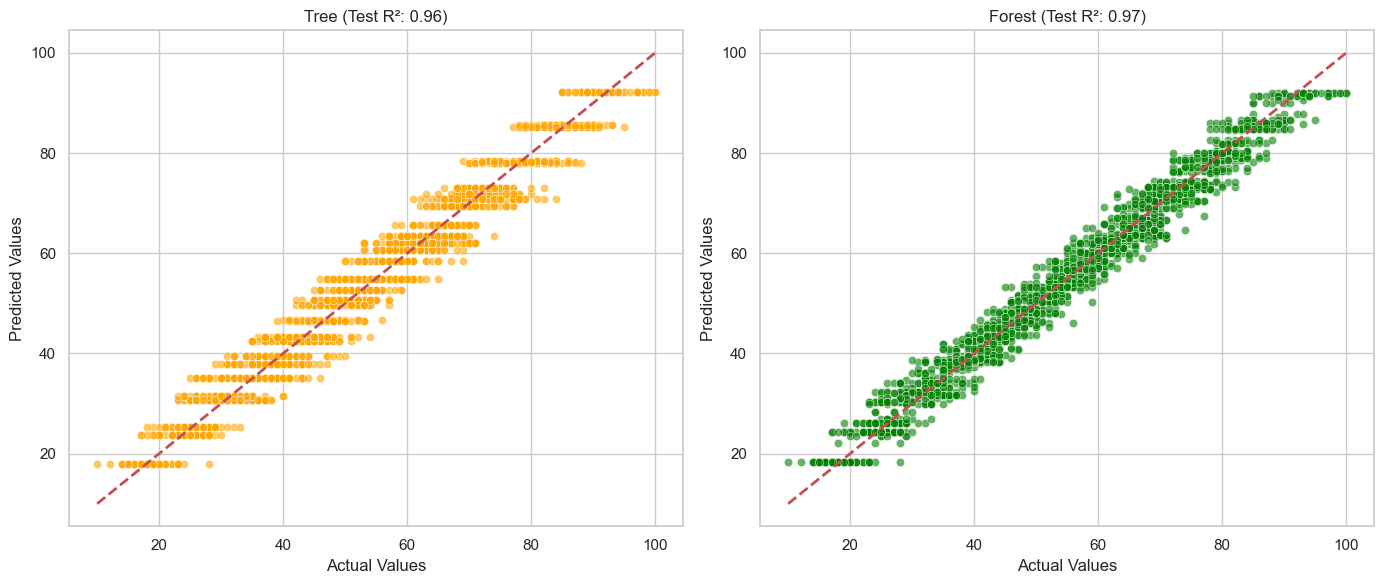

In [7]:
from src.regression_tree import RegressionTree
from src.random_forest import RandomForest
from src.utils import evaluate_model, add_runtime, print_runtimes
from src.utils import print_results
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1. EVALUATE REGRESSION TREE
start_training_rt = time.time()
tree_model = RegressionTree(min_samples_split=10, max_depth=5)
duration_training_rt = time.time() - start_training_rt
add_runtime("Training Regression Tree Student",duration_training_rt)

start_evaluation_rt = time.time()
tree_results = evaluate_model(tree_model, X_train, y_train, X_test, y_test)
duration_evaluation_rt = time.time() - start_evaluation_rt
add_runtime("Evaluation Regression Tree Student",duration_evaluation_rt)

print_results("REGRESSION TREE", tree_results)

# 2. EVALUATE RANDOM FOREST
start_training_rf = time.time()
rf_model = RandomForest(n_trees=10, max_depth=5, seed=123)
duration_training_rf= time.time() - start_training_rf
add_runtime("Training Random Forest Student",duration_training_rf)

start_evaluation_rf = time.time()
rf_results = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
duration_evaluation_rf = time.time() - start_evaluation_rf
add_runtime("Evaluation Random Forest Student",duration_evaluation_rf)

print_results("RANDOM FOREST", rf_results)
print_runtimes()

# 3. VISUAL COMPARISON
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Tree Results
sns.scatterplot(x=tree_results['y_test_actual'], y=tree_results['y_test_pred'], ax=axes[0], color='orange', alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title(f"Tree (Test R²: {tree_results['Test_R2']:.2f})")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Plot Forest Results
sns.scatterplot(x=rf_results['y_test_actual'], y=rf_results['y_test_pred'], ax=axes[1], color='green', alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title(f"Forest (Test R²: {rf_results['Test_R2']:.2f})")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

## Gridsearch

In [8]:
import itertools
from IPython.display import clear_output

# Define the Search Space
param_grid = {
    "n_trees": [10, 20, 50],
    "max_depth": [5, 10, None],
    "min_samples_split": [5, 10]
}

# Generate  combinations
keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(f"Starting Grid Search with {len(combinations)} candidates...")
print("-" * 60)

results_data = []
best_cv_r2 = -float("inf")
best_config = None

# Loop through every combination
for i, config in enumerate(combinations):
    clear_output(wait=True)

    print(f"[{i+1}/{len(combinations)}] Testing: {config}", end="")
    
    
    rf = RandomForest(
        n_trees=config["n_trees"], 
        max_depth=config["max_depth"] if config["max_depth"] is not None else float('inf'),
        min_samples_split=config["min_samples_split"],
        seed=123
    )
    
    # Run Evaluation
    metrics = evaluate_model(rf, X_train, y_train, X_test, y_test, n_splits=5)
    
    
    results_data.append({
        **config, 
        "CV_R2": metrics["CV_R2"],
        "Test_R2": metrics["Test_R2"],
        "Runtime": metrics["Runtime_Seconds"]
    })
    
    # Track the Winner
    if metrics["CV_R2"] > best_cv_r2:
        best_cv_r2 = metrics["CV_R2"]
        best_config = config


# Define tolerance
tolerance = 0.02 
threshold = best_cv_r2 - tolerance

# Display sorted table 
df_results = pd.DataFrame(results_data).sort_values(by="CV_R2", ascending=False)
display(df_results)

# Find models within tolerance
top_tier_models = df_results[df_results['CV_R2'] >= threshold].copy()

# Sort by runtime
efficient_winner = top_tier_models.sort_values(by='Runtime', ascending=True).iloc[0]

print("=" * 60)
print(f"ABSOLUTE ACCURACY WINNER (Best R²)")
print(f"   Config:  {df_results.iloc[0]['n_trees']} Trees, Depth {df_results.iloc[0]['max_depth']}")
print(f"   R²:      {df_results.iloc[0]['CV_R2']:.4f}")
print(f"   Runtime: {df_results.iloc[0]['Runtime']:.4f} s")
print("-" * 60)
print(f"EFFICIENT WINNER (Fastest model within {tolerance} of best score)")
print(f"   Config:  {efficient_winner['n_trees']} Trees, Depth {efficient_winner['max_depth']}")
print(f"   R²:      {efficient_winner['CV_R2']:.4f} (Diff: {efficient_winner['CV_R2'] - best_cv_r2:.4f})")
print(f"   Runtime: {efficient_winner['Runtime']:.4f} s")
print("=" * 60)



,n_trees,max_depth,min_samples_split,CV_R2,Test_R2,Runtime
15,50,10.0,10,0.986486,0.985180,53.073691
14,50,10.0,5,0.986417,0.985117,56.278018
9,20,10.0,10,0.986355,0.984956,20.941352
8,20,10.0,5,0.986289,0.984845,22.293335
17,50,NaN,10,0.986109,0.984757,74.828521
3,10,10.0,10,0.986089,0.984707,10.478037
2,10,10.0,5,0.985982,0.984692,11.093183
11,20,NaN,10,0.985917,0.984254,30.315276
5,10,NaN,10,0.985541,0.984072,15.238716
16,50,NaN,5,0.985437,0.984054,104.981806


ABSOLUTE ACCURACY WINNER (Best R²)
   Config:  50.0 Trees, Depth 10.0
   R²:      0.9865
   Runtime: 53.0737 s
------------------------------------------------------------
EFFICIENT WINNER (Fastest model within 0.02 of best score)
   Config:  10.0 Trees, Depth 5.0
   R²:      0.9746 (Diff: -0.0119)
   Runtime: 2.5910 s


## Comparison to Existing Implementations

We use the the default parameters for the existing techniques. Hence, the regression tree uses parameters `criterion='squared_error'` and `min_samples_split=2` and the random forest `criterion='squared_error'` and `n_estimators=100`.

The performance metrics for comparision are MSE/RMSE and $R^2$.

--- REGRESSION TREE existing ---
  CV MSE (Error):    8.9875
  CV R² (Stability):    0.9756
  Test MSE (Error):     9.4362
  Test RMSE (Error):    3.0718
  Test R² (Accuracy):   0.9741
------------------------------
--- RANDOM FOREST existing ---
  CV MSE (Error):    5.4373
  CV R² (Stability):    0.9853
  Test MSE (Error):     5.9153
  Test RMSE (Error):    2.4321
  Test R² (Accuracy):   0.9838
------------------------------

--- Runtime summary ---
Training Regression Tree Student: 0.0000 s
Evaluation Regression Tree Student: 0.0561 s
Training Random Forest Student: 0.0000 s
Evaluation Random Forest Student: 3.7000 s


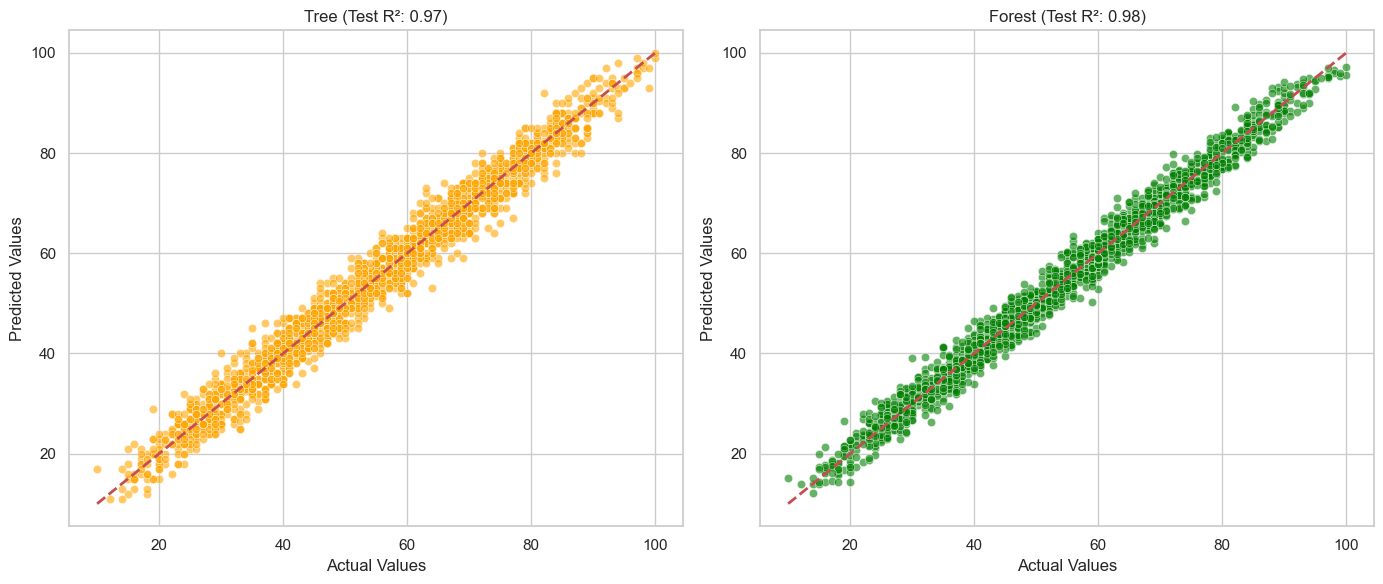

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# EXISTING IMPLENTATIONS
# 1. EVALUATE REGRESSION TREE
start_training_rt = time.time()
tree_model_exist = DecisionTreeRegressor(random_state=123)
duration_training_rt = time.time() - start_training_rt
add_runtime("Training Regression Tree Student",duration_training_rt)

start_evaluation_rt = time.time()
tree_results_exist = evaluate_model(tree_model_exist, X_train, y_train, X_test, y_test)
duration_evaluation_rt = time.time() - start_evaluation_rt
add_runtime("Evaluation Regression Tree Student",duration_evaluation_rt)

print_results("REGRESSION TREE existing", tree_results_exist)

# 2. EVALUATE RANDOM FOREST
# (Note: Using 'seed' as per your previous message)
start_training_rf = time.time()
rf_model_exist = RandomForestRegressor(random_state=123)
duration_training_rf= time.time() - start_training_rf
add_runtime("Training Random Forest Student",duration_training_rf)

start_evaluation_rf = time.time()
rf_results_exist = evaluate_model(rf_model_exist, X_train, y_train, X_test, y_test)
duration_evaluation_rf = time.time() - start_evaluation_rf
add_runtime("Evaluation Random Forest Student",duration_evaluation_rf)

print_results("RANDOM FOREST existing", rf_results_exist)
print_runtimes()

# 3. VISUAL COMPARISON
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Tree Results
sns.scatterplot(x=tree_results_exist['y_test_actual'], y=tree_results_exist['y_test_pred'], ax=axes[0], color='orange', alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title(f"Tree (Test R²: {tree_results_exist['Test_R2']:.2f})")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Plot Forest Results
sns.scatterplot(x=rf_results_exist['y_test_actual'], y=rf_results_exist['y_test_pred'], ax=axes[1], color='green', alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title(f"Forest (Test R²: {rf_results_exist['Test_R2']:.2f})")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()